In [2]:
import pandas as pd

In [3]:
file_1 = './part2/read_csv_sample.csv'

In [10]:
df_1 = pd.read_csv(file_1)
df_1

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [6]:
df_2 = pd.read_csv(file_1, header=None)
df_2

,0,1,2,3
0,c0,c1,c2,c3
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9


In [8]:
df_3 =pd.read_csv(file_1, index_col='c1')
df_3

,c0,c2,c3
c1,,,
1,0,4,7
2,1,5,8
3,2,6,9


In [12]:
df_2 =pd.read_excel('./part2/남북한발전전력량.xlsx', header=None)
df_2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
2,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
3,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
4,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
5,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
6,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
7,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
8,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
9,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [14]:
df_4 = pd.read_json('./part2/read_json_sample.json',)
df_4

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True


In [15]:
df_5 = pd.read_html('./part2/sample.html')
df_5

[   Unnamed: 0  c0  c1  c2  c3
 0           0   0   1   4   7
 1           1   1   2   5   8
 2           2   2   3   6   9,
          name  year        developer  opensource
 0       NumPy  2006  Travis Oliphant        True
 1  matplotlib  2003   John D. Hunter        True
 2      pandas  2008    Wes Mckinneye        True]

In [18]:
pd.read_html('./part2/sample.html')

[   Unnamed: 0  c0  c1  c2  c3
 0           0   0   1   4   7
 1           1   1   2   5   8
 2           2   2   3   6   9,
          name  year        developer  opensource
 0       NumPy  2006  Travis Oliphant        True
 1  matplotlib  2003   John D. Hunter        True
 2      pandas  2008    Wes Mckinneye        True]

In [183]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# 위키피디아 미국 ETF 웹 페이지에서 필요한 정보를 스크래핑하여 딕셔너리 형태로 변수 etfs에 저장
url = "https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'lxml')   
rows = soup.select('div > ul > li')
    
etfs = {}
for row in rows:
    
    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)
        
        if (len(etf_ticker) > 0) & (len(etf_market) > 0):
            if (len(etf_name) == 0):
                etfs[etf_ticker[0]] = [etf_market[0], 'Nan']
            else:    
                etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]

    except AttributeError as err:
        pass    

# etfs 딕셔너리 출력
print(etfs)
print('\n')

# etfs 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(etfs)
print(df)

{'ITOT': ['NYSE Arca', 'iShares Core S&P Total US Stock Mkt'], 'IWV': ['NYSE Arca', 'iShares Russell 3000 Index'], 'SCHB': ['NYSE Arca', 'Schwab US Broad Market ETF'], 'FNDB': ['NYSE Arca', 'Schwab Fundamental U.S. Broad Market Index ETF'], 'VT': ['NYSE Arca', 'Vanguard Total World Stock'], 'VTI': ['NYSE Arca', 'Vanguard Total Stock Market'], 'VXUS': ['NYSE Arca', 'Vanguard Total International Stock'], 'VTHR': ['NYSE Arca', 'Vanguard Russell 3000'], 'DIA': ['NYSE Arca', 'DIAMONDS Trust, Series 1'], 'RSP': ['NYSE Arca', 'Guggenheim S&P 500 Equal Weight'], 'IOO': ['NYSE Arca', 'iShares S&P Global 100 Index'], 'IVV': ['NYSE Arca', 'iShares S&P 500 Index'], 'SPY': ['NYSE Arca', 'SPDR S&P 500'], 'VOO': ['NYSE Arca', 'Vanguard S&P 500'], 'IWM': ['NYSE Arca', 'iShares Russell 2000 Index'], 'OEF': ['NYSE Arca', 'iShares S&P 100 Index'], 'CVY': ['NYSE Arca', 'Guggenheim Multi-Asset Income'], 'RPG': ['NYSE Arca', 'Guggenheim S&P 500 Pure Growth ETF'], 'RPV': ['NYSE Arca', 'Guggenheim S&P 500 Pur

In [22]:
df = pd.DataFrame(etfs)
df

,ITOT,IWV,SCHB,FNDB,VT,VTI,VXUS,VTHR,DIA,RSP,...,CEW,CRDT,CYB,ELD,EMCB,EU,ICB,RRF,USDU,WDTI
0,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,...,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca
1,iShares Core S&P Total US Stock Mkt,iShares Russell 3000 Index,Schwab US Broad Market ETF,Schwab Fundamental U.S. Broad Market Index ETF,Vanguard Total World Stock,Vanguard Total Stock Market,Vanguard Total International Stock,Vanguard Russell 3000,"DIAMONDS Trust, Series 1",Guggenheim S&P 500 Equal Weight,...,WisdomTree Dreyfus Emerging Currency,WisdomTree Strategic Corporate Bond Fund,WisdomTree Dreyfus Chinese Yuan,WisdomTree Emerging Markets Local Debts Fund,WisdomTree Emerging Markets Corporate Bond Fund,WisdomTree Euro Debt Fund,WisdomTree Dreyfus Indian Rupee,WisdomTree Global Real Return,WisdomTree Bloomberg U.S. Dollar Bullish Fund,WisdomTree Managed Futures Strategy Fund


## 여러 개의 데이터브레임의 하나의 Excel 파일로 저장

In [184]:
data1 = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }
data2 = {'c0':[1,2,3], 
         'c1':[4,5,6], 
         'c2':[7,8,9], 
         'c3':[10,11,12], 
         'c4':[13,14,15]}


In [185]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [188]:
writer = pd.ExcelWriter("./df_excelwriter.xlsx")
df1.to_excel(writer, sheet_name='sheet1')
df2.to_excel(writer, sheet_name='sheet2')
writer.save()

# 3. 데이터 살펴보기

In [45]:
df_1= pd.read_csv('./part3/auto-mpg.csv', header=None)

In [47]:
df_1.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [49]:
df_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [50]:
df_1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [53]:
df_1.shape # 행과 열의 개수를 튜플로 나타냄

(398, 9)

In [55]:
df_1.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [189]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [191]:
df_1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

In [193]:
df_1.mpg.dtypes

dtype('float64')

In [56]:
df_1.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [75]:
df_2 = pd.read_excel('./part2/남북한발전전력량.xlsx')
df_2

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [139]:
df_3 = df_2.iloc[[0,5], 3:]
df_3

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
5,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


In [147]:
df_3.index=['south','north']

In [86]:
df_3.columns = df_3.columns.map(str)
type(df_3.columns[0])

str

In [195]:
df_3.columns = df_3.columns.map(int)

In [198]:
type(df_3.columns[0])

Index(['south', 'north'], dtype='object')

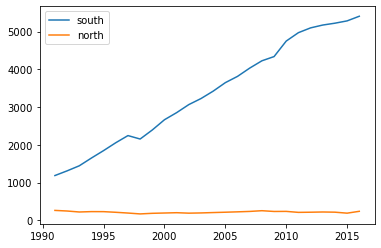

In [199]:
df_3.T.plot()

In [178]:
df = pd.read_csv('./part3/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


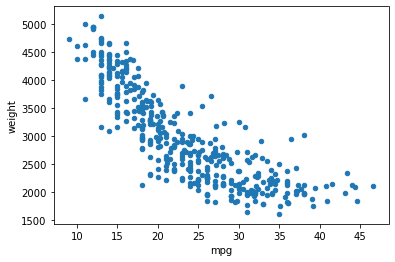

In [179]:
# 산점도를 이용해 상관계수를 시각적으로 확인할 수 있다.
df.plot(kind='scatter', x='mpg', y='weight')

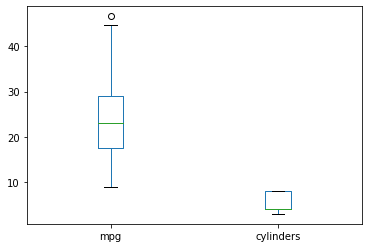

In [180]:
# 박스 플릇
# 데이터의 범위/중앙값을 확인
# 이상치의 존재 여부 확인 가능
df[['mpg', 'cylinders']].plot(kind='box')

In [173]:
import numpy as np
df = pd.DataFrame(np.random.normal(size=1000))

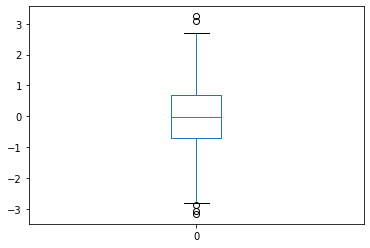

In [174]:
df.plot(kind='box')

In [175]:
df

,0
0,-0.811251
1,0.115947
2,-0.550671
3,-0.998800
4,0.414013
...,...
995,0.386157
996,0.680778
997,1.783099
998,-1.447637
